<a href="https://colab.research.google.com/github/cristinarainich/MLTSA22_KRainich/blob/main/HW9/KR_HW9_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports, data preparation 

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
from scipy import stats 
from scipy.stats import linregress
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from tensorflow import keras
from keras import layers 
from keras.layers import Dense, Input, Flatten,\
                   Reshape, LeakyReLU as LR,\
                   Activation, Dropout
from keras.models import Model, Sequential
from sklearn.metrics import confusion_matrix
from keras import backend as K

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample', 'ndim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pwd

/content


In [ ]:
cd /content/gdrive/MyDrive/MLTSA22/HW7

/content/gdrive/MyDrive/MLTSA22/HW7


In [ ]:
!ls /content/gdrive/MyDrive/MLTSA22/HW7

data_after.csv	       test_set_batch2.csv  test_set_batch9.csv
data_note.pdf	       test_set_batch3.csv  test_set.csv
PLAsTiCC-2018.zip      test_set_batch4.csv  test_set_metadata.csv
sample_submission.csv  test_set_batch5.csv  test_set_sample.csv
test_set_batch10.csv   test_set_batch6.csv  training_set.csv
test_set_batch11.csv   test_set_batch7.csv  training_set_metadata.csv
test_set_batch1.csv    test_set_batch8.csv


In [ ]:
df = pd.read_csv('data_after.csv', header=None)

In [ ]:
df.shape

(47088, 500)

In [ ]:
astron = df.to_numpy()

In this dataframe, we have 47 088 raws corresponding to 7848 astronomical objects and their 6 bands. So, first 6 rows are the bands for object 1, next 6 rows - the bands for object 2 and etc. The order of bands os the following: [2 1 3 4 5 0]. Now let's reshape this data so that we will have the data frame of (7847, 3000) shape. In other words, each line will correspond to the time series of one astronomical object where the bands will follow each other in a fixed order.

In [ ]:
astron.shape

(47088, 500)

In [ ]:
data = np.zeros((7848, 3000))

In [ ]:
data.shape

(7848, 3000)

In [ ]:
astron[:6].flatten()

array([-0.76362928, -0.57447335, -0.51294726, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
counter = 0
j = 0
for i in range(0, astron.shape[0], 6):
  if i != 0:
    data[j] = astron[counter:i].flatten() #we take each 6 rows, combine (flatten) them and put as a new row in data dataset. 
    counter = i
    j += 1

In [ ]:
data.shape

(7848, 3000)

## Autoencoder model

Here I will create a really simple autoencoder to get the automated feature so that I could feed it into the classifier later. 

In [ ]:
data_train, data_test = train_test_split(data, test_size=0.3, shuffle = True)

In [ ]:
data_train.shape

(5493, 3000)

In [ ]:
data_test.shape

(2355, 3000)

In [ ]:
ndim = data.shape[1]
model = Sequential()
## encoder
# input layer and the output size
model.add(Dense(128, activation='relu', input_dim=ndim))
#compression layer
model.add(Dense(64, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model.add(Dense(128, activation='relu'))
#output layer, same size as input
model.add(Dense(ndim, activation='linear'))

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error")

I've found a blog where the researchers were applying adam optimizer to time series data. It is recommended to use for noisy data. Is our data noisy? Most probably very much so. 

In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               384128    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 3000)              387000    
                                                                 
Total params: 787,704
Trainable params: 787,704
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
autoencoder = model.fit(data_train, data_train, 
                               validation_data=(data_test, data_test),
                               epochs=20, batch_size=100, verbose=1)

Epoch 1/20
55/55 [==============================] - 3s 21ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 2/20
55/55 [==============================] - 1s 13ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 3/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 4/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/20
55/55 [==============================] - 1s 9ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 10/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 11/20
55/

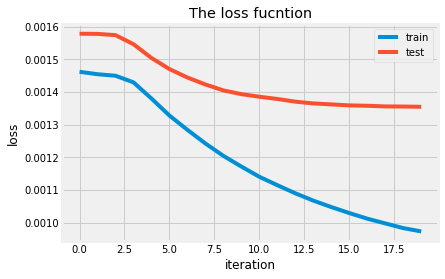

In [ ]:
pl.figure()
pl.plot(np.array(autoencoder.history['loss']))
pl.plot(autoencoder.history['val_loss'])
pl.ylabel('loss')
pl.xlabel('iteration')
pl.title('The loss fucntion')
pl.legend(['train', 'test']);
#pl.yscale('log')
#pl.xscale('log')

Fig. 1. The plot of the loss function for our train and testing dataset. I've tried 200 and less epochs, but the model overfits based on the trend of test loss function. Here I could notice some leaning towards overfitting but let's keep it like that. Ideally, I would love to train it in real time until it reaches the lowest (locally) point in test function or till convergence (which is not really happening here). I used 20 epochs here because later on the overfitting could really influence the output of the classifier (initial hypothesis). After rerunning the script, it didn't change it. 

In [ ]:
predictions_auto = model.predict(data_test)

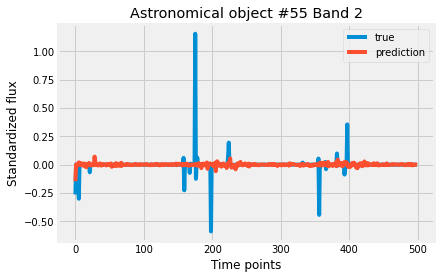

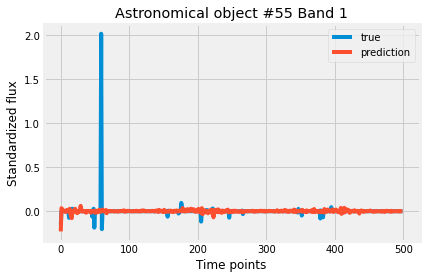

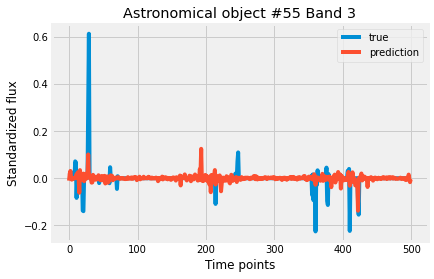

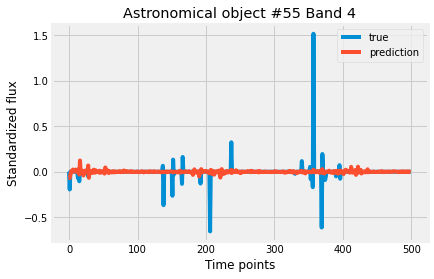

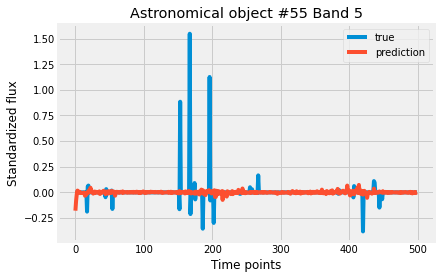

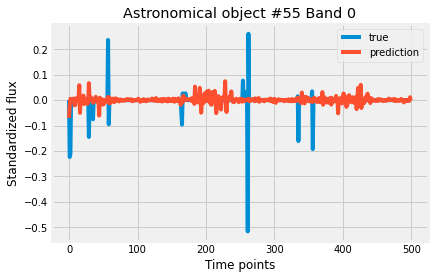

In [ ]:
sample = data_test[55]
sample_pred = predictions_auto[55]
bands = [2, 1, 3, 4, 5, 0]
counter = 0
j = 0
for i in range(0, 3001, 500):
  if i != 0:
    pl.figure()
    pl.plot(sample[counter:i], label = 'true')
    pl.plot(sample_pred[counter:i], label = 'prediction')
    pl.xlabel("Time points")
    pl.ylabel("Standardized flux")
    pl.title("Astronomical object #55 " + "Band " + str(bands[j]))
    pl.legend();
    counter = i
    j += 1



Fig. 2. Here are the plot of real and predicted flux based on the autoencoder model for a particular astronomical object in different bands. In orange - there are predicted values, whereas in blue - real ones. We can see that the model grasps overall trend but drastically decrease the fluctuations that could be noise or meaningful data.  

<font color="red"> FBB yeah, the model i not very good, lets see if it still helps you make predictions </font>

## Feature extraction

Now let's extract features from bottleneck layer of the auroencoder and use them for the classification problem later.

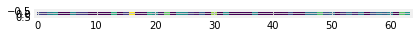

In [ ]:
# input placeholder
inp = model.input                   
# extract the bottle neck outputs
outputs = model.layers[1].output     
# create a function to evaluate the output of the bottle neck layer for a given input
functors = K.function([inp], [outputs])    
# Testing
layer_outs = functors(data_test[:1])
pl.imshow(layer_outs[0]);

Fig. 3. The reducted representation of the one of the features in the bottleneck layer.

In [ ]:
outputs.shape

TensorShape([None, 64])

In [ ]:
btlnck = Model(inputs = inp, outputs = outputs)
btlnck_pred = btlnck.predict(data)

In [ ]:
btlnck_pred.shape

(7848, 64)

In [ ]:
btlnck_pred[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.5908939 , 0.11599205, 0.        , 0.96384203,
       0.47609997, 0.        , 0.02504164, 0.9371057 , 0.        ,
       1.1720443 , 1.0265878 , 0.10092629, 0.        , 0.68914086,
       1.1816869 , 1.132575  , 0.5120853 , 0.        , 0.5315187 ,
       0.94854784, 1.7090197 , 0.14061275, 0.32185152, 1.2560097 ,
       0.5179154 , 0.        , 1.885252  , 0.07407217, 0.        ,
       0.        , 1.8911154 , 0.        , 0.9640707 , 0.9549562 ,
       0.47828722, 0.7348816 , 0.35262564, 0.01574286, 0.        ,
       0.        , 0.28630462, 0.36177927, 1.3432533 , 1.1971294 ,
       0.33743882, 0.        , 0.17340323, 0.6726199 , 0.3830188 ,
       0.8742219 , 0.        , 0.6522187 , 0.5230649 , 0.        ,
       0.7020346 , 0.        , 1.0477828 , 2.5160835 ], dtype=float32)

## Combining autoencoder and preselected features

So, we extracted the features from the bottleneck layer. Now let's combine them with the preselected features that we've chosen for HW 7. 

In [ ]:
!ls /content/gdrive/MyDrive/MLTSA22/HW7

allfeatures.csv        test_set_batch1.csv  test_set_batch8.csv
data_after.csv	       test_set_batch2.csv  test_set_batch9.csv
data_note.pdf	       test_set_batch3.csv  test_set.csv
PLAsTiCC-2018.zip      test_set_batch4.csv  test_set_metadata.csv
sample_submission.csv  test_set_batch5.csv  test_set_sample.csv
test_set_batch10.csv   test_set_batch6.csv  training_set.csv
test_set_batch11.csv   test_set_batch7.csv  training_set_metadata.csv


In [ ]:
allfeatures = pd.read_csv('allfeatures.csv', header=None,
                          names = ('0 mean_stand', '0 min_raw', '0 max_raw', '0 std_stand', '0 slopes', '0 intercepts',
                                   '1 mean_stand', '1 min_raw', '1 max_raw', '1 std_stand', '1 slopes', '1 intercepts',
                                   '2 mean_stand', '2 min_raw', '2 max_raw', '2 std_stand', '2 slopes', '2 intercepts',
                                   '3 mean_stand', '3 min_raw', '3 max_raw', '3 std_stand', '3 slopes', '3 intercepts',
                                   '4 mean_stand', '4 min_raw', '4 max_raw', '4 std_stand', '4 slopes', '4 intercepts',
                                   '5 mean_stand', '5 min_raw', '5 max_raw', '5 std_stand', '5 slopes', '5 intercepts',
                                   'decl'))

In [ ]:
allfeatures.head()

,0 mean_stand,0 min_raw,0 max_raw,0 std_stand,0 slopes,0 intercepts,1 mean_stand,1 min_raw,1 max_raw,1 std_stand,...,4 std_stand,4 slopes,4 intercepts,5 mean_stand,5 min_raw,5 max_raw,5 std_stand,5 slopes,5 intercepts,decl
0,4.229421e-17,-116.913223,125.182808,1.0,0.000524,-31.568270,2.871266e-16,-1100.440063,660.626343,1.0,...,1.0,0.001037,-62.397784,-9.738798e-18,-422.815094,378.188141,1.0,0.001003,-60.370675,-28.291550
1,3.806479e-17,-14.735178,14.509829,1.0,-0.002859,172.455472,1.586033e-17,-11.715749,9.129021,1.0,...,1.0,-0.002681,161.531278,-1.189525e-17,-14.211164,14.770886,1.0,-0.001978,119.182082,3.583322
2,-7.709882e-18,-3.459960,5.942166,1.0,-0.000121,7.289630,-1.120898e-17,-3.393080,5.693109,1.0,...,1.0,0.001477,-88.965827,4.789197e-17,-19.159811,47.310059,1.0,0.001259,-75.802184,3.583322
3,-1.079383e-16,-3.874349,18.014029,1.0,-0.000700,42.151725,2.725994e-17,-3.618410,192.244293,1.0,...,1.0,-0.000108,6.494881,-1.312082e-17,-10.249387,141.513290,1.0,0.000003,-0.159352,2.985506
4,3.524518e-18,-6.804703,5.330927,1.0,0.001234,-74.410211,-6.938894e-17,-2.622109,37.170177,1.0,...,1.0,0.001344,-80.863243,-1.292825e-16,-10.860540,109.157585,1.0,0.001110,-66.832942,3.732834


In [ ]:
allfeatures.shape

(7848, 37)

In [ ]:
bottle_feautures = pd.DataFrame(btlnck_pred) #features from autoencoder

In [ ]:
bottle_feautures.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.590894,0.115992,0.000000,0.963842,...,0.383019,0.874222,0.0,0.652219,0.523065,0.000000,0.702035,0.000000,1.047783,2.516083
1,0.329357,1.464800,0.000000,0.170306,0.000000,0.000000,1.127406,0.384771,0.000000,0.000000,...,0.705312,1.409930,0.0,0.951138,0.363668,0.000000,1.756211,0.000000,0.568735,0.000000
2,1.535905,0.044649,0.308551,0.593196,0.000000,0.526254,2.222599,1.682413,0.000000,1.181117,...,0.000000,1.122700,0.0,1.171075,0.000000,0.000000,0.995174,0.000000,0.433955,0.406399
3,1.481751,1.660629,1.032909,0.703080,0.041574,0.000000,0.060887,0.773529,1.563569,2.377713,...,0.169352,0.621480,0.0,0.297847,0.429912,0.000000,0.749168,2.066718,0.344063,0.780639
4,1.145870,0.092270,0.263010,0.197343,0.000000,0.233508,0.368287,0.197053,0.000000,0.112890,...,0.226921,0.486456,0.0,0.000000,0.437688,0.340835,0.101877,0.000000,0.380171,0.000000


In [ ]:
features = pd.concat([allfeatures, bottle_feautures], axis = 1)

In [ ]:
features.shape

(7848, 101)

In [ ]:
features.head() #all features together

,0 mean_stand,0 min_raw,0 max_raw,0 std_stand,0 slopes,0 intercepts,1 mean_stand,1 min_raw,1 max_raw,1 std_stand,...,54,55,56,57,58,59,60,61,62,63
0,4.229421e-17,-116.913223,125.182808,1.0,0.000524,-31.568270,2.871266e-16,-1100.440063,660.626343,1.0,...,0.383019,0.874222,0.0,0.652219,0.523065,0.000000,0.702035,0.000000,1.047783,2.516083
1,3.806479e-17,-14.735178,14.509829,1.0,-0.002859,172.455472,1.586033e-17,-11.715749,9.129021,1.0,...,0.705312,1.409930,0.0,0.951138,0.363668,0.000000,1.756211,0.000000,0.568735,0.000000
2,-7.709882e-18,-3.459960,5.942166,1.0,-0.000121,7.289630,-1.120898e-17,-3.393080,5.693109,1.0,...,0.000000,1.122700,0.0,1.171075,0.000000,0.000000,0.995174,0.000000,0.433955,0.406399
3,-1.079383e-16,-3.874349,18.014029,1.0,-0.000700,42.151725,2.725994e-17,-3.618410,192.244293,1.0,...,0.169352,0.621480,0.0,0.297847,0.429912,0.000000,0.749168,2.066718,0.344063,0.780639
4,3.524518e-18,-6.804703,5.330927,1.0,0.001234,-74.410211,-6.938894e-17,-2.622109,37.170177,1.0,...,0.226921,0.486456,0.0,0.000000,0.437688,0.340835,0.101877,0.000000,0.380171,0.000000


In [ ]:
features.decl.isna().sum()

7805

For some reason in 'features' (which are preselected ones) there are nan values for decl column, however, there is nothing like that in original data. I will change it further by substituting the column in features by the column from the original data since decl feature is unchanged.

<font color="red"> FBB ok </font>

## Random Forest classification

Now let's use random forest classifier to try to assign our astrological objects based on the set of features to the target class. 

In [ ]:
metadata = pd.read_csv('training_set_metadata.csv')

In [ ]:
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [ ]:
features['decl'] = metadata['decl']

In [ ]:
features.decl.isna().sum()

0

No NAN values, hurray!

In [ ]:
feature_list = list(features.columns)
features_combined = np.array(features) #all our features in one df

In [ ]:
features_combined.shape

(7848, 101)

In [ ]:
meta = metadata[['object_id', 'target']]
meta.shape

(7848, 2)

In [ ]:
len(meta.target.unique())

14

In [ ]:
labels = np.array(meta.target)
len(labels)

7848

**Random Forest on all the feautures**

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features_combined, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5886, 101)
Training Labels Shape: (5886,)
Testing Features Shape: (1962, 101)
Testing Labels Shape: (1962,)


In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, min_samples_leaf = 3)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('decl')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  89.35


In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 14.57 degrees.


I've took the code about the degrees from here https://towardsdatascience.com/random-forest-in-python-24d0893d51c0. And I really liked the idea of setting a threshold before training a classifier, so that we would understand what would happen if we don't put any effort at all. As in 'no effort' condition, I assumed what would happen if we predict target based only on decl? The error would be disastrous.

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 52.07 %.


In [ ]:
train_score = rf.score(train_features, train_labels)
test_score = rf.score(test_features, test_labels)

In [ ]:
print('During training, the accuracy score was ' + str(round(train_score, 3)))
print('During testing, the accuracy score was ' + str(round(test_score, 3)))

During training, the accuracy score was 0.934
During testing, the accuracy score was 0.618


Based on our accuracy scores, the model is overfitting. I've read that RF can easily overfit to the noise in the data, it's clearly what's going on here. They recommended tuning some hyperparameters like leaf number to change that. 
With no minimum number of leafs - the accuracy for training set was 1, when it was set to 25 - it changed to 0.6. Given minimum number for leaf equal to 3, we get rid of overfitting here. But overall testing accuracy score is above chance, but really bad. It might be that the choice of features could lead to this.

<font color="red"> FBB ok, good observation </font>

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: 2 min_raw            Importance: 0.08
Variable: 1 min_raw            Importance: 0.07
Variable: 0 max_raw            Importance: 0.06
Variable: 3 min_raw            Importance: 0.06
Variable: 5 max_raw            Importance: 0.06
Variable: 4 min_raw            Importance: 0.05
Variable: 4 max_raw            Importance: 0.05
Variable: 1 max_raw            Importance: 0.04
Variable: 2 max_raw            Importance: 0.04
Variable: 3 max_raw            Importance: 0.04
Variable: 5 min_raw            Importance: 0.04
Variable: 0 min_raw            Importance: 0.03
Variable: 2 slopes             Importance: 0.03
Variable: 2 intercepts         Importance: 0.03
Variable: 3 slopes             Importance: 0.03
Variable: 3 intercepts         Importance: 0.03
Variable: 4 slopes             Importance: 0.03
Variable: 4 intercepts         Importance: 0.03
Variable: 0 slopes             Importance: 0.02
Variable: 0 intercepts         Importance: 0.02
Variable: 1 slopes             Importanc

Based on these results, we can observe that most of the features do not have significant importance for the classifier. Interestingly, looks like none of the autoencoder feautures contribute to the classification process.

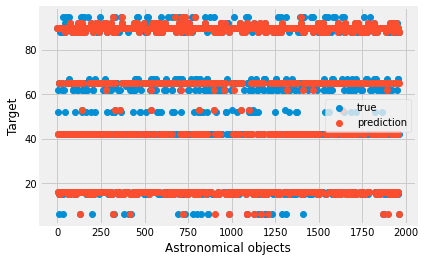

In [ ]:
pl.figure()
pl.plot(test_labels, "o", label = 'true')
pl.plot(predictions, "o", label = 'prediction')
pl.legend()
pl.xlabel('Astronomical objects')
pl.ylabel('Target')
pl.title('');

Fig. 4. The plot of true and predicted labels for the astronomical objects. In blue there are true labels, and in orange - predicted by classifier. We can spot what 'classes' our classifier fails to map correctly. For instance, classes between 40 and 65 are really poorly mapped.

<font color="red"> FBB a confusion matrix sould be a better vis here </font>

Let's train the **RF only on the preselected features**. 

In [ ]:
features.columns[:37]

Index(['0 mean_stand', '0 min_raw', '0 max_raw', '0 std_stand', '0 slopes',
       '0 intercepts', '1 mean_stand', '1 min_raw', '1 max_raw', '1 std_stand',
       '1 slopes', '1 intercepts', '2 mean_stand', '2 min_raw', '2 max_raw',
       '2 std_stand', '2 slopes', '2 intercepts', '3 mean_stand', '3 min_raw',
       '3 max_raw', '3 std_stand', '3 slopes', '3 intercepts', '4 mean_stand',
       '4 min_raw', '4 max_raw', '4 std_stand', '4 slopes', '4 intercepts',
       '5 mean_stand', '5 min_raw', '5 max_raw', '5 std_stand', '5 slopes',
       '5 intercepts', 'decl'],
      dtype='object')

In [ ]:
only_preselected = features[['0 mean_stand', '0 min_raw', '0 max_raw', '0 std_stand', '0 slopes',
       '0 intercepts', '1 mean_stand', '1 min_raw', '1 max_raw', '1 std_stand',
       '1 slopes', '1 intercepts', '2 mean_stand', '2 min_raw', '2 max_raw',
       '2 std_stand', '2 slopes', '2 intercepts', '3 mean_stand', '3 min_raw',
       '3 max_raw', '3 std_stand', '3 slopes', '3 intercepts', '4 mean_stand',
       '4 min_raw', '4 max_raw', '4 std_stand', '4 slopes', '4 intercepts',
       '5 mean_stand', '5 min_raw', '5 max_raw', '5 std_stand', '5 slopes',
       '5 intercepts', 'decl']]

In [ ]:
only_preselected.shape

(7848, 37)

In [ ]:
train_f, test_f, train_l, test_l = train_test_split(only_preselected, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [ ]:
# Instantiate model with 1000 decision trees
rf_selected = RandomForestClassifier(n_estimators = 1000, random_state = 42, min_samples_leaf = 3)
# Train the model on training data
rf_selected.fit(train_f, train_l);

In [ ]:
# Use the forest's predict method on the test data
predictions_selected = rf_selected.predict(test_f)
# Calculate the absolute errors
errors_selected = abs(predictions_selected - test_l)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_selected), 2), 'degrees.')

Mean Absolute Error: 13.5 degrees.


In [ ]:
train_score_sel = rf_selected.score(train_f, train_l)
test_score_sel = rf_selected.score(test_f, test_l)

In [ ]:
print('During training, the accuracy score was ' + str(round(train_score_sel, 3)))
print('During testing, the accuracy score was ' + str(round(test_score_sel, 3)))

During training, the accuracy score was 0.953
During testing, the accuracy score was 0.634


Using only preselected features, the accuracy score increased only a little bit. So, there should be other problems to our data preprocessing steps or feature selection or the choice of parameters for the model. 

<font color="red"> FBB very good test to do only extracted features, well done (still overfititing) </font>

## Confusion matrix

In [ ]:
cf_matrix = confusion_matrix(test_labels, predictions)

In [ ]:
np.unique(test_labels)

array([ 6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95])

In [ ]:
np.unique(predictions)

array([ 6, 15, 16, 42, 53, 62, 65, 88, 90, 92, 95])

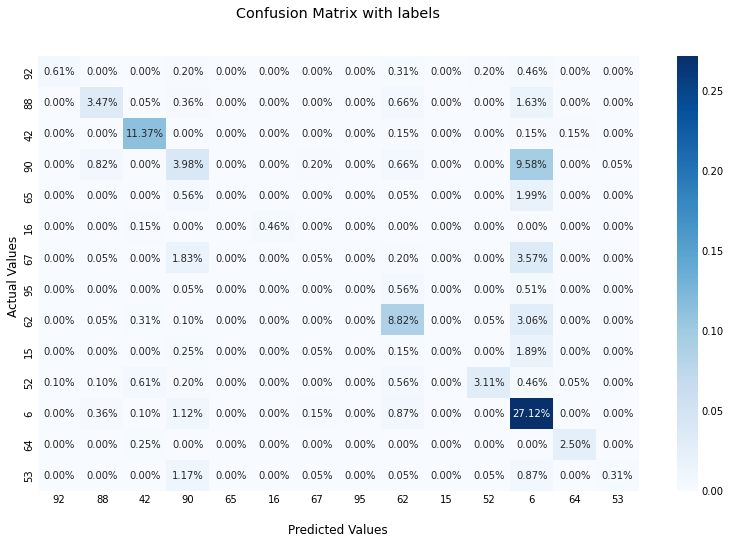

In [ ]:
pl.figure(figsize=(12,8))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.set_xticklabels(meta.target.unique())
ax.set_yticklabels(meta.target.unique())

## Display the visualization of the Confusion Matrix.
pl.show()

Fig. 5. Confusion matrix for true and predicted targets for astronomical objects classification problem. Based on the confusion matrix, we can understand how often a certain class has been assigned to a certain class. The best assignment score in our model is for class number 6. It correctly assigned in 27 % of cases. Interestingly, in 9 % (which is the highest for confusion of different classes) class 6 is confused with the class 90. 

<font color="red"> FBB overall good! your GP did not work out (see HW7) but you got through it and did great in this last homework! </font>